In [1]:
# 필요한 라이브러리 5개 np,ms,d 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

In [2]:
# 데이터 확인 : pd.read_csv ,info(), head()

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sampleSubmission.csv")


print(train.info())
print("_________________________________________________________________________")
print(test.info())
print("_________________________________________________________________________")
print(submission.info())
print("_________________________________________________________________________")
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None
_________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      ---------

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train.isnull().sum()
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [4]:
# pd.to_datetime
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


# EDA

In [5]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['dayofweek'] = test['datetime'].dt.dayofweek # 0~6: 월~일

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [6]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [7]:
# 카테고리형 변수: 
categorical_columns = ['season', # 봄여름가을겨울 -> 사용
                       'holiday',
                       'workingday',
                       'weather',
                       'year', 
                       'month',
                       'day',
                       'hour',
                       'dayofweek'
                      ]

# 연속형 변수 
continuous_columns = ['temp','atemp', 'humidity', 'windspeed']

## 카테고리형 변수 시각화 & 원핫 인코딩 & drop

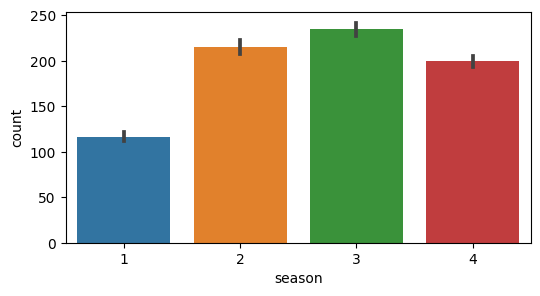

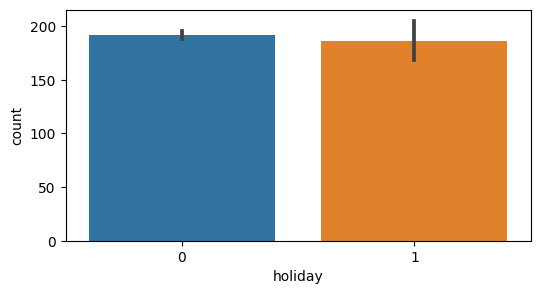

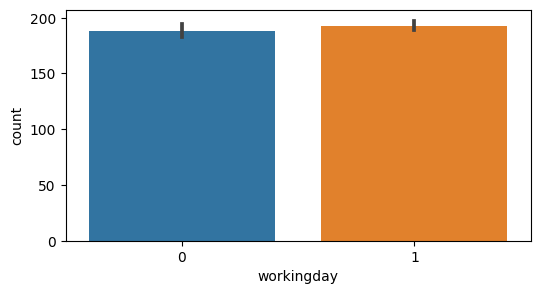

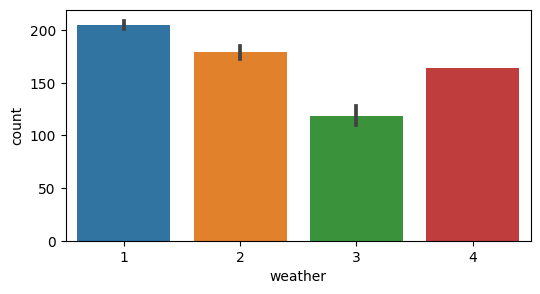

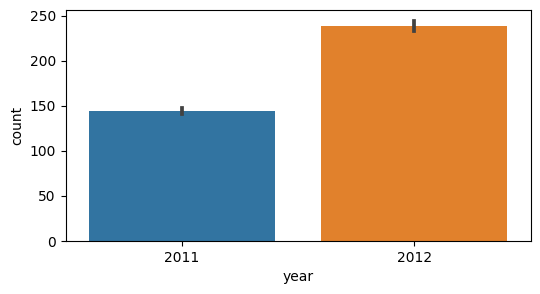

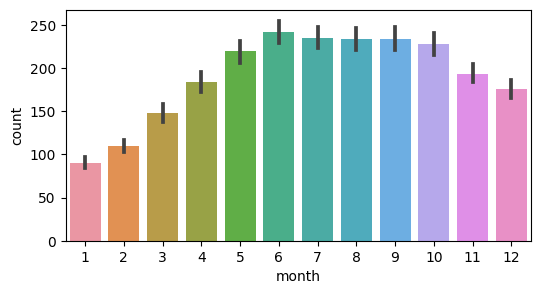

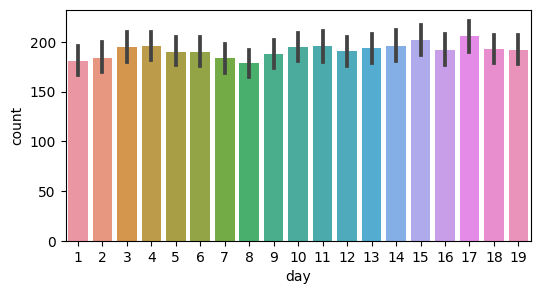

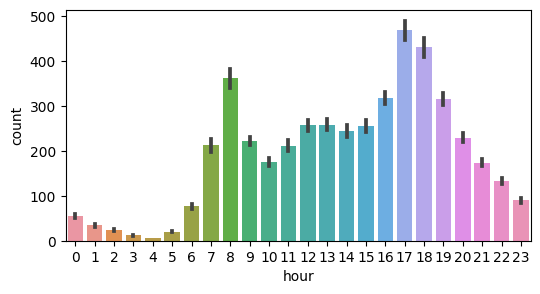

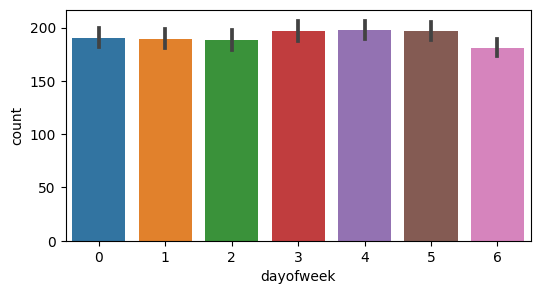

In [8]:
for  i in categorical_columns:
    plt.figure(figsize=(6,3))
    sns.barplot(data = train, x= i,y= 'count')
    plt.show()  

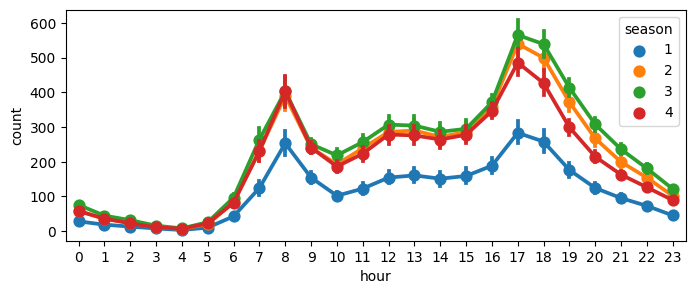

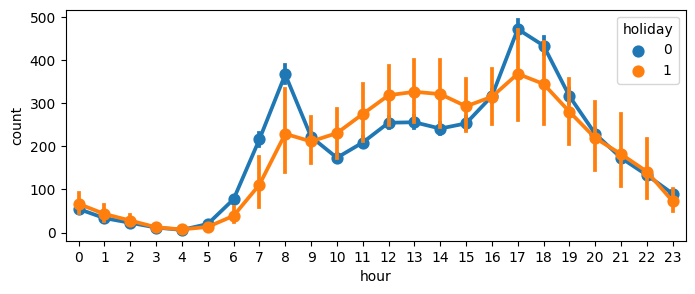

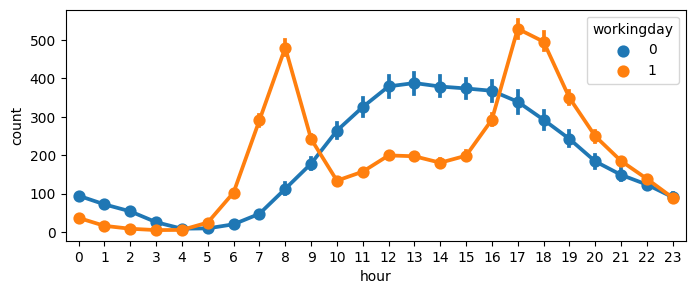

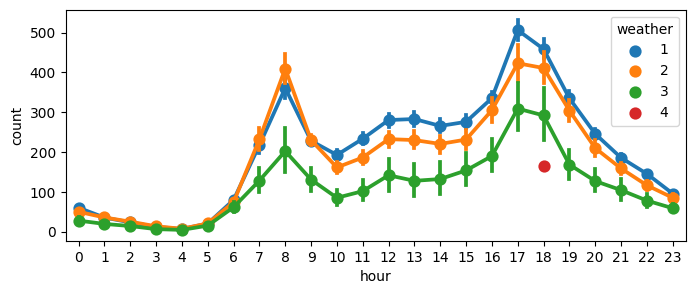

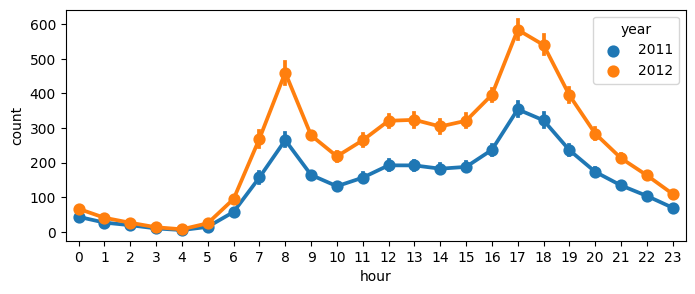

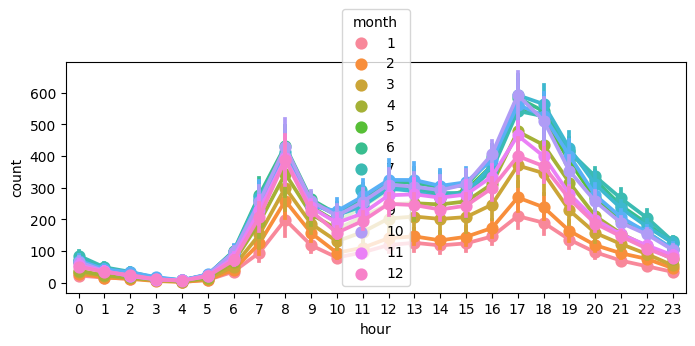

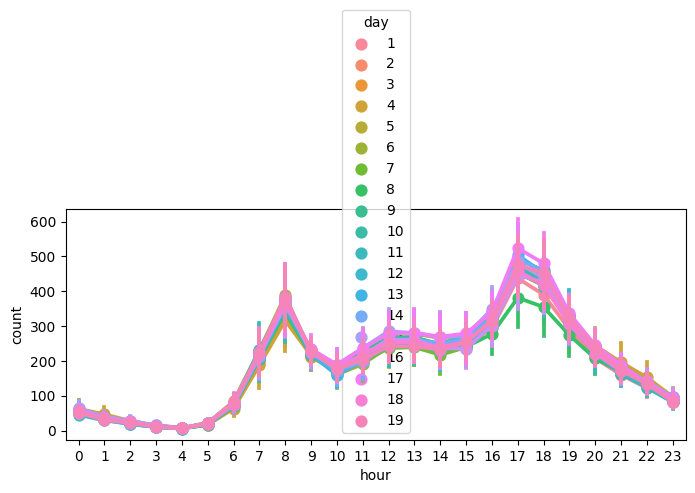

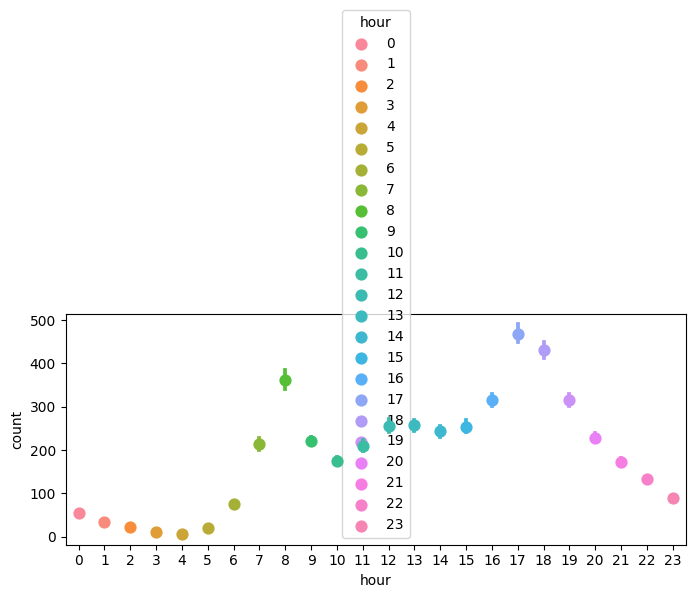

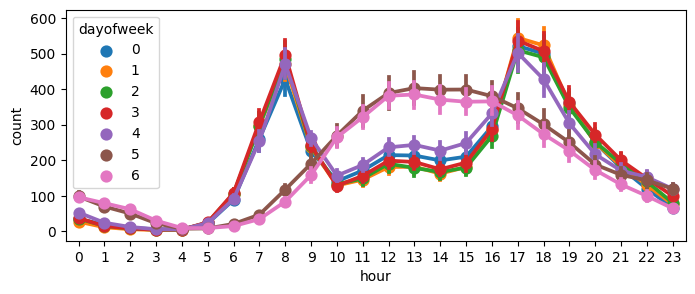

In [9]:
# workingday랑 holiday 시간대별로 확인
for i in categorical_columns:
    plt.figure(figsize= (8,3))
    sns.pointplot(data=train, x='hour', y='count',hue=i)
    plt.show()



In [10]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',
       'dayofweek'],
      dtype='object')

In [11]:


# 원핫인코딩 
# 카테고리칼 변수 중에서 이진 변수는 안해도됨(hodiday,workingday,year) 
#변수별 패턴이 뚜렷하지 않은것은 안해도됨 (day)
#트리기반 모델 사용할 때는 month,hour, dayofweek를 원핫인코딩 안해도됨. 하지만 선형 모델 사용할 땐 해야됨.

one_hot_encoding_columns=[
    'season',
 'weather' ] 

train = pd.get_dummies(train,columns=one_hot_encoding_columns)
test = pd.get_dummies(test, columns = one_hot_encoding_columns)

train_drop_columns = [
    'datetime',
    'workingday', # holiday랑 겹침 
    'casual', 'registered',
    ]

test_drop_columns = [
    'datetime',
    'workingday', # holiday랑 겹침 
    ]


train.drop(train_drop_columns,axis = 1,inplace =True)
test.drop(test_drop_columns, axis =1, inplace =True)






## 연속형 변수 시각화

<AxesSubplot:>

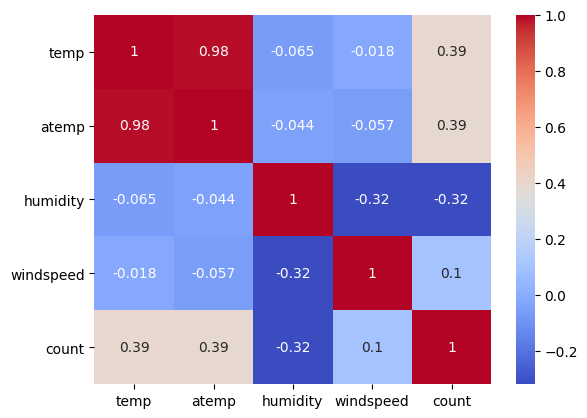

In [12]:
corr = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


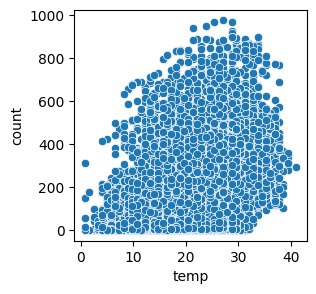

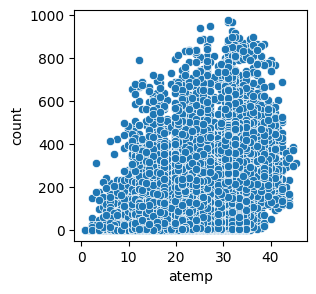

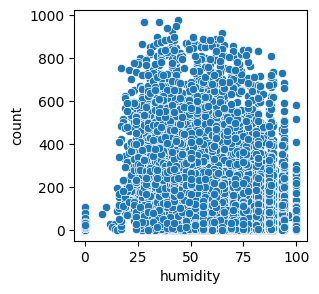

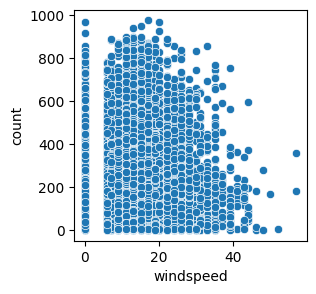

In [13]:
for i in continuous_columns:
    plt.figure(figsize=(3,3))
    sns.scatterplot(data = train, x=i,y= 'count')
    plt.show()

In [14]:
train.columns

Index(['holiday', 'temp', 'atemp', 'humidity', 'windspeed', 'count', 'year',
       'month', 'day', 'hour', 'dayofweek', 'season_1', 'season_2', 'season_3',
       'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [15]:
train_drop_columns =['atemp']
test_drop_columns =['atemp']
continuous_columns.remove('atemp')

train.drop(train_drop_columns,axis =1,inplace = True)
test.drop(train_drop_columns,axis =1,inplace = True)

# feature engineering
1. IQR 방법으로 이상치 제거
2. 왜도와 첨도 확인 후 count log 변환
3. windspeed 결측치 예측

## 1. 이상치제거

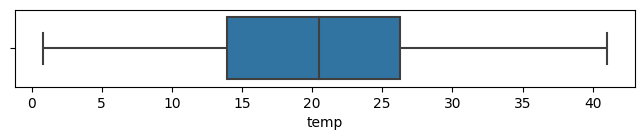

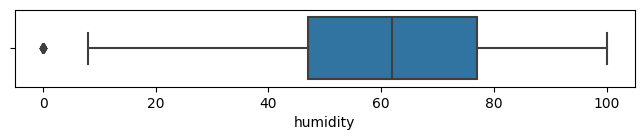

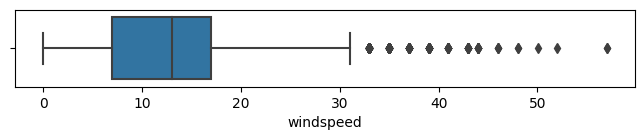

In [16]:
for i in continuous_columns:
    plt.figure(figsize=(8,1))
    sns.boxplot(data = train, x=i)
    plt.show()

In [17]:
#train = pd.read_csv("train.csv")
print(train.shape)

from collections import Counter

def detect_outliers(data, n, cols):
    outlier_indices = []

    for col in cols:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR

        outlier_list_col = data[(data[col] < Q1 - outlier_step) | 
                                (data[col] > Q3 + outlier_step)].index

        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers


Outliers_to_drop = detect_outliers(train,2 , continuous_columns)

train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop = True)

print(train.shape)

(10886, 18)
(10886, 18)


## 2. 첨도, 외도 확인 및 count log변환

C:\Users\Songwooseok\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


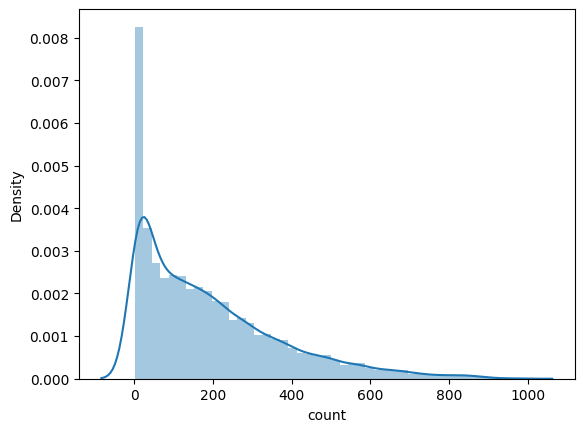

skewness(왜도): 1.2420662117180776
kurtosis(첨도): 1.3000929518398334


C:\Users\Songwooseok\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


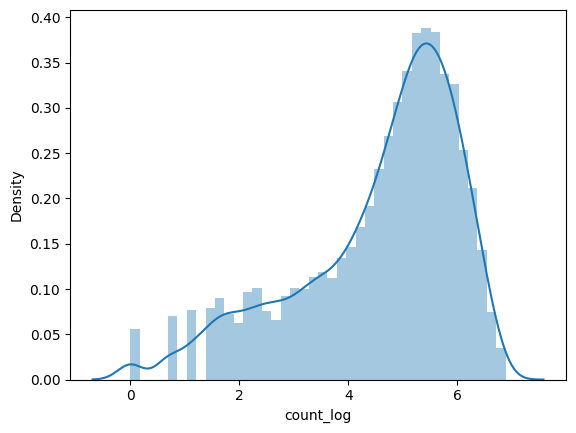

skewness(왜도): -0.971228
kurtosis(첨도): 0.246622


In [18]:
#train = pd.read_csv("train.csv")
sns.distplot(train['count'])
plt.show()
print('skewness(왜도):', train['count'].skew())
print('kurtosis(첨도):', train['count'].kurt())

train['count_log'] = train['count'].map(lambda i:np.log(i) if i > 0 else 0)
train.drop('count', axis = 1, inplace = True)

sns.distplot(train['count_log'])
plt.show()
print("skewness(왜도): %f" %train['count_log'].skew())
print("kurtosis(첨도): %f" %train['count_log'].kurt())



## 3. windspeed =0 대체값 찾기



In [19]:
train.columns

Index(['holiday', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day',
       'hour', 'dayofweek', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'count_log'],
      dtype='object')

In [20]:

from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    wind0 = data.loc[data['windspeed'] == 0]
    windnot0 = data.loc[data['windspeed'] != 0]

    # 풍속이 날씨 변수이기 때문에 날씨 변수를 활용해서 windspeed를 예측할 것
    col = ['season_1','season_2','season_3','season_4',
           'weather_1','weather_2','weather_3','weather_4',
           'temp', 'humidity', 'day']
    
    windnot0 = windnot0.copy()
    wind0 = wind0.copy()
    
    windnot0['windspeed'] = windnot0['windspeed'].astype('str')

    rf = RandomForestClassifier()
    rf.fit(windnot0[col], windnot0['windspeed'])

    pred_wind0 = rf.predict(wind0[col])
    wind0['windspeed'] = pred_wind0

    data = windnot0.append(wind0)
    data['windspeed'] = data['windspeed'].astype('float')

    data.reset_index(drop=True, inplace=True)

    return data
train = predict_windspeed(train)
test = predict_windspeed(test)
train[train['windspeed'] == 0.0]


"\nfrom sklearn.ensemble import RandomForestClassifier\n\ndef predict_windspeed(data):\n    wind0 = data.loc[data['windspeed'] == 0]\n    windnot0 = data.loc[data['windspeed'] != 0]\n\n    # 풍속이 날씨 변수이기 때문에 날씨 변수를 활용해서 windspeed를 예측할 것\n    col = ['season_1','season_2','season_3','season_4',\n           'weather_1','weather_2','weather_3','weather_4',\n           'temp', 'humidity', 'day']\n    \n    windnot0 = windnot0.copy()\n    wind0 = wind0.copy()\n    \n    windnot0['windspeed'] = windnot0['windspeed'].astype('str')\n\n    rf = RandomForestClassifier()\n    rf.fit(windnot0[col], windnot0['windspeed'])\n\n    pred_wind0 = rf.predict(wind0[col])\n    wind0['windspeed'] = pred_wind0\n\n    data = windnot0.append(wind0)\n    data['windspeed'] = data['windspeed'].astype('float')\n\n    data.reset_index(drop=True, inplace=True)\n\n    return data\ntrain = predict_windspeed(train)\ntest = predict_windspeed(test)\ntrain[train['windspeed'] == 0.0]\n"

# 모델링

In [21]:
test.columns

Index(['holiday', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day',
       'hour', 'dayofweek', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [22]:
train.columns

Index(['holiday', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day',
       'hour', 'dayofweek', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'count_log'],
      dtype='object')

In [23]:
test.columns

Index(['holiday', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day',
       'hour', 'dayofweek', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4'],
      dtype='object')

In [24]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

features = train.columns[:-1] # count log 제외 

X = train[features]
y = train['count_log']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model2 = LinearRegression()
model3 = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)


In [25]:
model = model1

model.fit(X_train, y_train)
score_train = model.score(X_train, y_train)
score_val = model.score(X_val, y_val)

print("score_train",score_train)
print("score_val",score_val)
y_pred_val = model.predict(X_val)
rmsle = np.sqrt(mean_squared_log_error(np.exp(y_val), np.exp(y_pred_val)))
print("✅ RMSLE on validation set:", rmsle)


X_test = test[features]
test_pred_log = model.predict(X_test)

test_pred = np.exp(test_pred_log)

submission = pd.read_csv("sampleSubmission.csv")  # 또는 'submission.csv'
submission['count'] = test_pred
submission.to_csv("final_submission.csv", index=False)

print("📁 final_submission.csv 파일 저장 완료!")


score_train 0.9925110239947318
score_val 0.9583806654262077
✅ RMSLE on validation set: 0.27582198629449184
📁 final_submission.csv 파일 저장 완료!


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score



# 3. 불필요한 컬럼 제거
df.drop(['datetime', 'casual', 'registered', 'count'], axis=1, inplace=True)

# 4. 입력(X), 타겟(y) 설정
X = df.drop('weather', axis=1)
y = df['weather']

# 5. 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. 모델 정의 및 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 7. 예측 및 평가
y_pred = model.predict(X_val)

print("✅ 정확도:", accuracy_score(y_val, y_pred))
print("\n✅ 분류 리포트:\n", classification_report(y_val, y_pred))


Index(['holiday', 'temp', 'humidity', 'windspeed', 'year', 'month', 'day',
       'hour', 'dayofweek', 'season_1', 'season_2', 'season_3', 'season_4',
       'weather_1', 'weather_2', 'weather_3', 'weather_4', 'count_log'],
      dtype='object')

In [42]:
submission

,datetime,count
0,2011-01-20 00:00:00,9.803913
1,2011-01-20 01:00:00,1.917731
2,2011-01-20 02:00:00,1.671865
3,2011-01-20 03:00:00,6.669670
4,2011-01-20 04:00:00,33.430181
...,...,...
6488,2012-12-31 19:00:00,185.961677
6489,2012-12-31 20:00:00,185.351832
6490,2012-12-31 21:00:00,196.049757
6491,2012-12-31 22:00:00,63.671445


In [1]:
import pandas as pd 
import numpy as np
df = pd.read_csv('test.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [2]:
df.loc[0:3,'windspeed'] = np.nan
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,NaN
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,NaN
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,NaN
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,NaN
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [3]:
df[df['windspeed'].isnull()].index

Int64Index([0, 1, 2, 3], dtype='int64')

In [4]:
df.loc[0:3,'windspeed'] = np.nan
df = df.dropna(subset=['windspeed'])
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [5]:
df.loc[0:3,'windspeed'] = np.nan
df['windspeed']= df['windspeed'].fillna(0)
df

C:\Users\Songwooseok\miniconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Songwooseok\AppData\Local\Temp\ipykernel_10820\982909675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['windspeed']= df['windspeed'].fillna(0)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [6]:
df['windspeed'] = df['windspeed'].fillna(df['windspeed'].mean())
df

C:\Users\Songwooseok\AppData\Local\Temp\ipykernel_10820\1545533011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['windspeed'] = df['windspeed'].fillna(df['windspeed'].mean())


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
5,2011-01-20 05:00:00,1,0,1,1,9.84,11.365,60,15.0013
6,2011-01-20 06:00:00,1,0,1,1,9.02,10.605,60,15.0013
7,2011-01-20 07:00:00,1,0,1,1,9.02,10.605,55,15.0013
8,2011-01-20 08:00:00,1,0,1,1,9.02,10.605,55,19.0012
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [7]:
def get_grade(x):
    if x>10: 
        return "아니"
    else: return "왜"

df = pd.read_csv('test.csv')
df['특징'] = df['windspeed'].apply(get_grade)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,특징
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,아니
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,왜
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,왜
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,아니
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,아니
...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,아니
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,아니
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,아니
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,왜


In [28]:
zz = df['특징'].value_counts().reset_index()
zz.columns = ['특징','count']
zz= zz.sort_values('특징',
               ascending=False
              )
zz

,특징,count
1,왜,2621
0,아니,3872


In [8]:
zz = df['특징'].value_counts().reset_index()
zz.columns = ['특징','count']
zz.to_csv("df.csv",index = False)

In [9]:
zz

,특징,count
0,아니,3872
1,왜,2621


In [10]:
df.loc[df['atemp']>12]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,특징
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,왜
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,왜
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,아니
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,아니
11,2011-01-20 11:00:00,1,0,1,2,11.48,13.635,45,11.0014,아니
...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,아니
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,아니
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,아니
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,왜


In [11]:
df.loc[df['atemp']>12,'temp'] = 33
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,특징
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,아니
1,2011-01-20 01:00:00,1,0,1,1,33.00,13.635,56,0.0000,왜
2,2011-01-20 02:00:00,1,0,1,1,33.00,13.635,56,0.0000,왜
3,2011-01-20 03:00:00,1,0,1,1,33.00,12.880,56,11.0014,아니
4,2011-01-20 04:00:00,1,0,1,1,33.00,12.880,56,11.0014,아니
...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,33.00,12.880,60,11.0014,아니
6489,2012-12-31 20:00:00,1,0,1,2,33.00,12.880,60,11.0014,아니
6490,2012-12-31 21:00:00,1,0,1,1,33.00,12.880,60,11.0014,아니
6491,2012-12-31 22:00:00,1,0,1,1,33.00,13.635,56,8.9981,왜


In [12]:
df['sss'] = df['temp']+df['atemp']
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,특징,sss
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,아니,22.025
1,2011-01-20 01:00:00,1,0,1,1,33.00,13.635,56,0.0000,왜,46.635
2,2011-01-20 02:00:00,1,0,1,1,33.00,13.635,56,0.0000,왜,46.635
3,2011-01-20 03:00:00,1,0,1,1,33.00,12.880,56,11.0014,아니,45.880
4,2011-01-20 04:00:00,1,0,1,1,33.00,12.880,56,11.0014,아니,45.880
...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,33.00,12.880,60,11.0014,아니,45.880
6489,2012-12-31 20:00:00,1,0,1,2,33.00,12.880,60,11.0014,아니,45.880
6490,2012-12-31 21:00:00,1,0,1,1,33.00,12.880,60,11.0014,아니,45.880
6491,2012-12-31 22:00:00,1,0,1,1,33.00,13.635,56,8.9981,왜,46.635


In [13]:
df.groupby('weather').mean()

,season,holiday,workingday,temp,atemp,humidity,windspeed,sss
weather,,,,,,,,
1,2.534944,0.032457,0.661692,30.704080,25.143808,58.495617,12.553254,55.847888
2,2.429825,0.026316,0.733333,30.591789,22.426994,71.173684,11.856551,53.018784
3,2.378571,0.012500,0.723214,28.991607,20.386938,84.944643,15.566277,49.378545
4,1.000000,0.000000,0.500000,7.380000,8.335000,89.500000,17.500400,15.715000


In [14]:
df.groupby('weather')['humidity'].mean()

weather
1    58.495617
2    71.173684
3    84.944643
4    89.500000
Name: humidity, dtype: float64

In [15]:
df.groupby(['weather','humidity']).sum()

season  holiday  workingday     temp     atemp  windspeed  \
weather humidity                                                              
1       16             5        0           1    66.00    60.605    11.0014   
        17             9        0           3   132.00   102.265    31.0076   
        18             7        0           2    99.00    87.115    36.9974   
        19             2        0           1    33.00    27.275    11.0014   
        20            14        0           7   231.00   181.055    82.9996   
...                  ...      ...         ...      ...       ...        ...   
3       93           119        1          56  1489.56   896.975  1147.0467   
        94           217        0          57  2376.00  1689.380   885.0097   
        100          108        0          30  1396.66   873.475   426.0195   
4       86             1        0           0     5.74     6.820    12.9980   
        93             1        0           1     9.02     9.850    22.0028   

                       sss  
weather humidity            
1       16         126.605  
        17         234.265  
        18         186.115  
        19          60.275  
        20         412.055  
...                    ...  
3       93        2386.535  
        94        4065.380  
        100       2270.135  
4       86          12.560  
        93          18.870  

[189 rows x 7 columns]

In [16]:
df.drop(['weather'],axis=1)

,datetime,season,holiday,workingday,temp,atemp,humidity,windspeed,특징,sss
0,2011-01-20 00:00:00,1,0,1,10.66,11.365,56,26.0027,아니,22.025
1,2011-01-20 01:00:00,1,0,1,33.00,13.635,56,0.0000,왜,46.635
2,2011-01-20 02:00:00,1,0,1,33.00,13.635,56,0.0000,왜,46.635
3,2011-01-20 03:00:00,1,0,1,33.00,12.880,56,11.0014,아니,45.880
4,2011-01-20 04:00:00,1,0,1,33.00,12.880,56,11.0014,아니,45.880
...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,33.00,12.880,60,11.0014,아니,45.880
6489,2012-12-31 20:00:00,1,0,1,33.00,12.880,60,11.0014,아니,45.880
6490,2012-12-31 21:00:00,1,0,1,33.00,12.880,60,11.0014,아니,45.880
6491,2012-12-31 22:00:00,1,0,1,33.00,13.635,56,8.9981,왜,46.635


In [17]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,특징,sss
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,아니,22.025
1,2011-01-20 01:00:00,1,0,1,1,33.00,13.635,56,0.0000,왜,46.635
2,2011-01-20 02:00:00,1,0,1,1,33.00,13.635,56,0.0000,왜,46.635
3,2011-01-20 03:00:00,1,0,1,1,33.00,12.880,56,11.0014,아니,45.880
4,2011-01-20 04:00:00,1,0,1,1,33.00,12.880,56,11.0014,아니,45.880
...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,33.00,12.880,60,11.0014,아니,45.880
6489,2012-12-31 20:00:00,1,0,1,2,33.00,12.880,60,11.0014,아니,45.880
6490,2012-12-31 21:00:00,1,0,1,1,33.00,12.880,60,11.0014,아니,45.880
6491,2012-12-31 22:00:00,1,0,1,1,33.00,13.635,56,8.9981,왜,46.635
